![SuperHeroes](https://github.com/jorge-flores-py/Proyecto-Procesamiento-de-Datos/blob/main/images/Super_Heroes.png?raw=true "Proyecto PRO1 Procesamiento de Datos 2023")
## Procesamiento de Datos
En esta notebook vamos a efectuar el EDA, de manera tal que los datos queden adecuados para el siguiente proceso de Transformación de Datos.

### 1. Instalación de Librerías y Carga de Datos

Instalación de las librerías a utilizar

In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

Realizamos la lectura del archivo superheroes.csv donde tenemos los datos a analizar y hacemos una vista previa de los mismos

In [40]:
df = pd.read_csv("superheroes.csv",sep=',', engine='python',skiprows=0,index_col=False)
print(df)

df.head()

      ID             Name Alignment  Gender EyeColor               Race  \
0      0           A-Bomb      good    Male   yellow              Human   
1      1       Abe Sapien      good    Male     blue      Icthyo Sapien   
2      2         Abin Sur      good    Male     blue            Ungaran   
3      3      Abomination       bad    Male    green  Human / Radiation   
4      4          Abraxas       bad    Male     blue      Cosmic Entity   
..   ...              ...       ...     ...      ...                ...   
729  729  Yellowjacket II      good  Female     blue              Human   
730  730             Ymir      good    Male    white        Frost Giant   
731  731             Yoda      good    Male    brown     Yoda's species   
732  732          Zatanna      good  Female     blue              Human   
733  733             Zoom       bad    Male      red                  -   

            HairColor          Publisher SkinColor  Height  Weight  
0             No Hair      Mar

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


### 2. Análisis Exploratorio

In [41]:
# Comprobamos la información que tiene cada dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         734 non-null    int64  
 1   Name       734 non-null    object 
 2   Alignment  734 non-null    object 
 3   Gender     734 non-null    object 
 4   EyeColor   734 non-null    object 
 5   Race       734 non-null    object 
 6   HairColor  734 non-null    object 
 7   Publisher  719 non-null    object 
 8   SkinColor  734 non-null    object 
 9   Height     734 non-null    float64
 10  Weight     732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [42]:
# Eliminamos la columna ID
df = df.drop('ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       734 non-null    object 
 1   Alignment  734 non-null    object 
 2   Gender     734 non-null    object 
 3   EyeColor   734 non-null    object 
 4   Race       734 non-null    object 
 5   HairColor  734 non-null    object 
 6   Publisher  719 non-null    object 
 7   SkinColor  734 non-null    object 
 8   Height     734 non-null    float64
 9   Weight     732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [43]:
#Se verifican la cantidad de datos faltantes
df.isna().sum()

Name          0
Alignment     0
Gender        0
EyeColor      0
Race          0
HairColor     0
Publisher    15
SkinColor     0
Height        0
Weight        2
dtype: int64

In [44]:
#Revisamos los valores que contiene la columna Altura:
df['Height'].value_counts()
#Se comprueba que hay muchas alturas con el valor -99 (Valores faltantes)

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 211.0      5
 157.0      5
 203.0      5
 244.0      4
 155.0      3
 226.0      3
 229.0      3
 218.0      3
 30.5       2
 122.0      2
 279.0      2
 137.0      2
 305.0      2
 206.0      2
 366.0      2
 234.0      1
 304.8      1
 160.0      1
 140.0      1
 15.2       1
 297.0      1
 64.0       1
 71.0       1
 287.0      1
 257.0      1
 79.0       1
 259.0      1
 701.0      1
 108.0      1
 62.5       1
 876.0      1
 142.0      1
 975.0      1
 267.0      1
 61.0       1
 66.0       1
Name: Height, dtype: int64

In [45]:
#Realizamos lo mismo con los valores que contiene la columna Peso:
df['Weight'].value_counts()
#Se comprueba que hay muchos pesos con el valor -99 (Valores faltantes)

-99.0     237
 54.0      23
 79.0      23
 81.0      22
 90.0      19
         ... 
 119.0      1
 48.0       1
 4.0        1
 115.0      1
 17.0       1
Name: Weight, Length: 135, dtype: int64

In [46]:
#Visualizamos la cantidad de registros y columnas
df.shape

(734, 10)

In [47]:
#Calculamos la información estadistica de los datos
df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


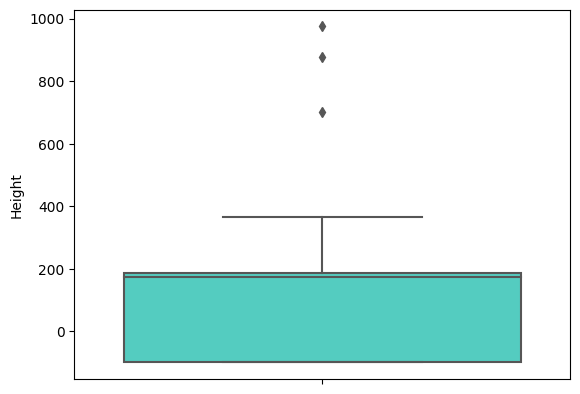

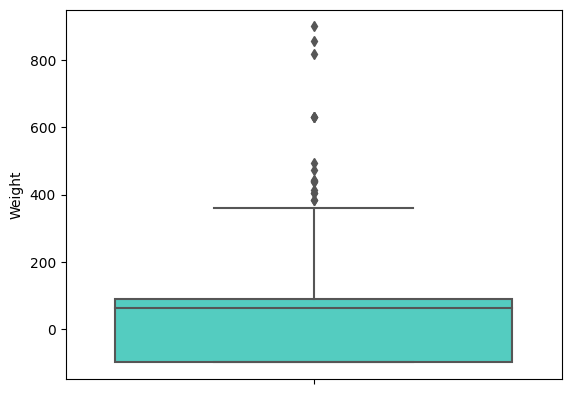

In [48]:
# Boxplot de la Altura y pesos de los super héroes
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i],color="turquoise")
        plt.show()

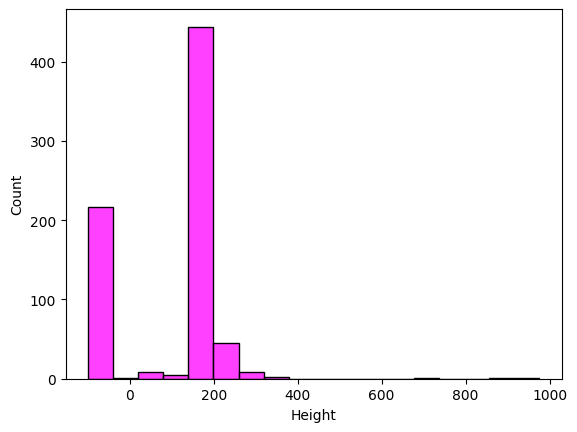

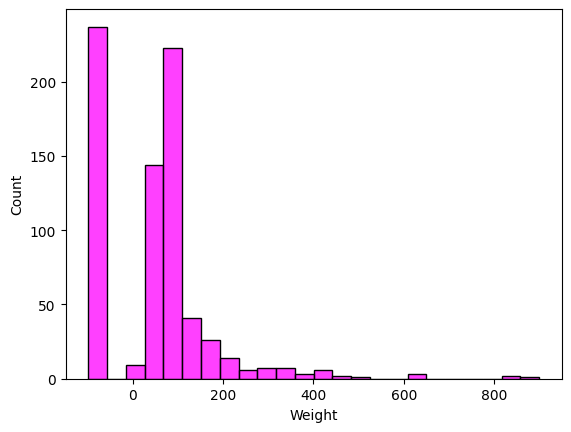

In [49]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],color='magenta')
        plt.show()

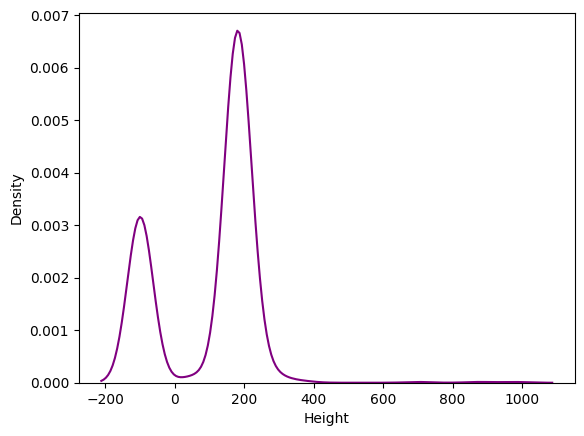

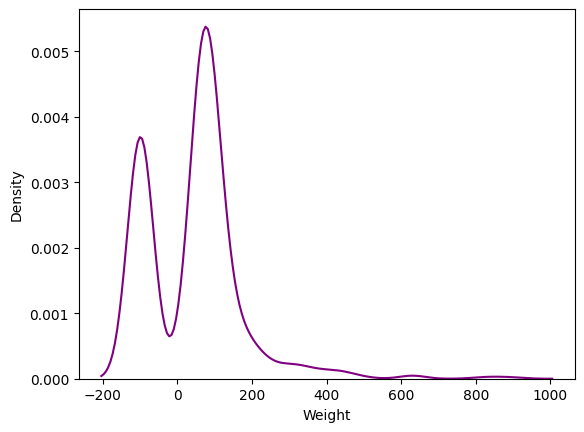

In [50]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x =df[i],color="purple" )
        plt.show()

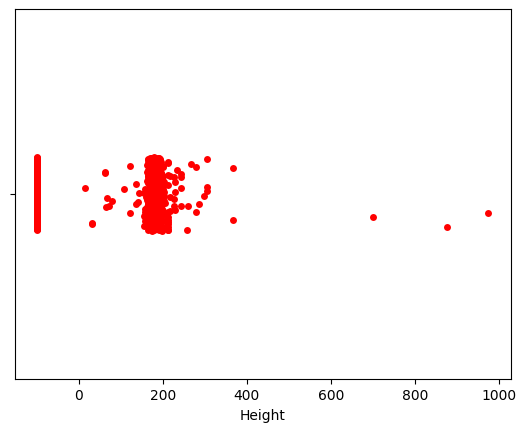

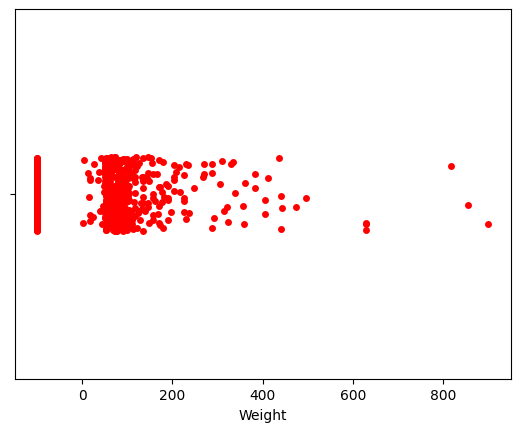

In [51]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.stripplot(x =df[i],color = "red")
        plt.show()

In [52]:
df['Alignment'].unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [53]:
df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [54]:
#Destacamos las tres editoriales con más super héroes
df.loc[(df['Publisher'] != 'Marvel Comics')  & (df['Publisher'] != 'Dark Horse Comics')& (df['Publisher'] != 'DC Comics'),'Publisher'] = 'Otro'

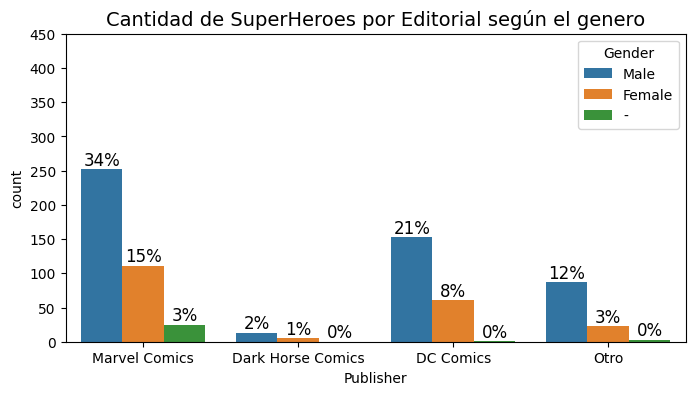

In [55]:
#Graficamos teniendo en cuenta el género del superhéroe y la editorial
Publisher_df=df[['Publisher','Gender']]


plt.figure(figsize=(8,4))
sns.countplot(x='Publisher',data=Publisher_df,hue='Gender')
plt.title('Cantidad de SuperHeroes por Editorial según el genero', fontsize=14)

def roundup(x):
    return 50 + int(math.ceil(x / 100.0)) * 100 

total =float(len(Publisher_df))
ax = plt.gca()
y_max = df['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

Se puede apreciar que hay mayoria de superhéroes hombres en todas las editoriales

Analizamos la altura y peso según el género del superhéroe

In [56]:
df = df.drop(df.columns[10:],axis=1)
df['Height'].unique()

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 975. , 142. , 876. ,  62.5, 108. , 701. ,
       259. ,  79. , 155. ,  71. , 287. , 234. ,  64. , 366. , 206. ,
       305. , 297. , 137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

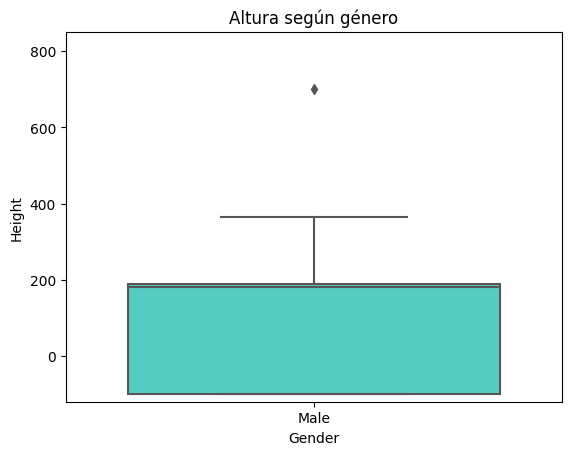

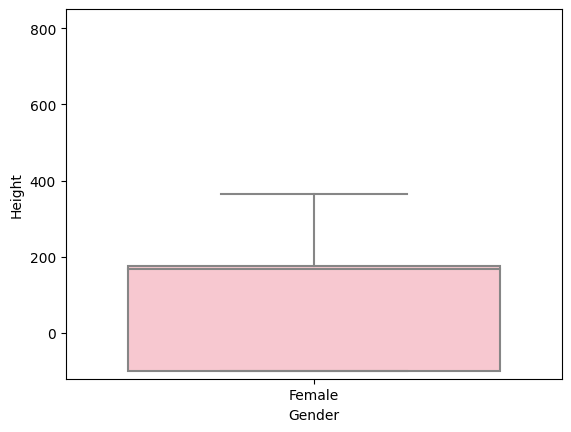

In [57]:
Altura_df=df.drop(df[df['Height']=='Unknown'].index)

Altura_M=Altura_df.drop(Altura_df[Altura_df['Gender']!= 'Male'].index)
Altura_F=Altura_df.drop(Altura_df[Altura_df['Gender']!= 'Female'].index)

plt.title('Altura según género')
plt.ylim(-120,850)
sns.boxplot(x='Gender',y='Height',data=Altura_M, width =0.75, color='turquoise')
plt.show()
plt.ylim(-120,850)
sns.boxplot(x='Gender',y='Height',data=Altura_F, width =0.75, color='pink')

plt.show()

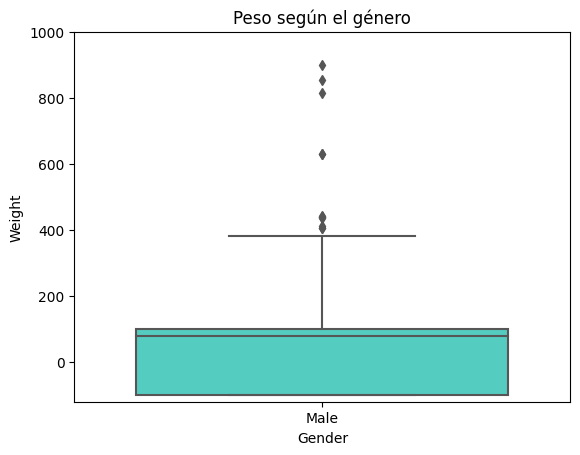

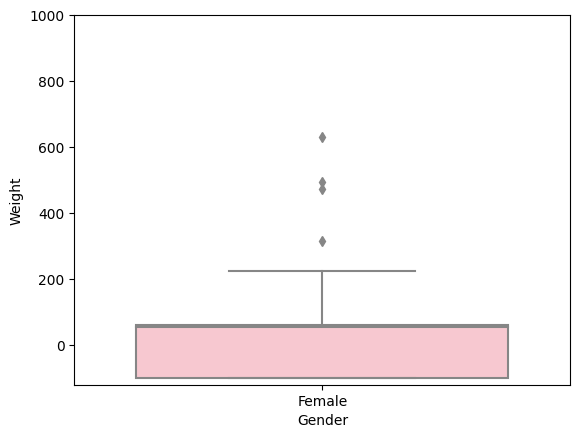

In [58]:
Peso_df=df.drop(df[df['Weight']=='Unknown'].index)
Peso_df=Peso_df.dropna()

Peso_M=Peso_df.drop(Peso_df[Peso_df['Gender']!= 'Male'].index)
Peso_F=Peso_df.drop(Peso_df[Peso_df['Gender']!= 'Female'].index)

plt.title('Peso según el género')
plt.ylim(-120,1000)
sns.boxplot(x='Gender',y='Weight',data=Peso_M, width =0.75,color='turquoise')
plt.show()
plt.ylim(-120,1000)
sns.boxplot(x='Gender',y='Weight',data=Peso_F, width =0.75, color='pink')
plt.show()

Se observa que los pesos de los superhéroes hombres son mas altos que los pesos de las heroínas.

---

### 3. Conclusion Previa
Con esto en vista podemos reconocer que el dataset y las variables que posee nos sirven para analizar y evaluar el objetivo que hemos planteado de manera grupal en las charlas previas que tuvimos para encarar el proyecto y que se verán en la notebook de Transformación de Datos.